C:\Users\1\AppData\Local\Temp\ipykernel_3016\3202551565.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
C:\Users\1\AppData\Local\Temp\ipykernel_3016\3202551565.py:9: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('datacount7.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
E:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
E:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  880
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -5655.426
Date:                Mon, 11 Dec 2023   AIC                          11316.851
Time:                        22:51:59   BIC                          11331.188
Sample:                    02-01-2021   HQIC                         11322.334
                         - 06-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3650      0.031    -11.805      0.000      -0.426      -0.304
ma.L2         -0.5948      0.032    -18.831      0.000      -0.657      -0.533
sigma2      2.263e+04   1148.891     19.700      0.0

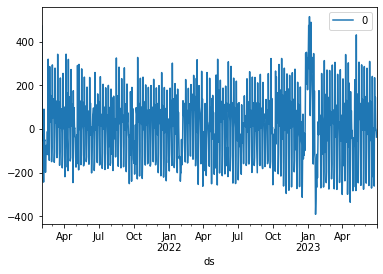

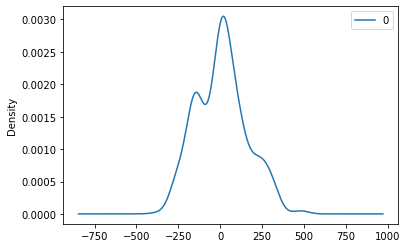

                0
count  880.000000
mean     6.718909
std    151.243030
min   -391.469461
25%   -117.034016
50%      7.768441
75%     96.513627
max    516.052626


In [1]:
# fit an ARIMA model and plot residual errors
import pandas as pd
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# load dataset
series = read_csv('datacount7.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series = series.astype('float32')
train_end_date = '2023-07-01'
train_end_date = pd.to_datetime(train_end_date)
train = series.loc[series.index < train_end_date]
test = series.loc[series.index >= train_end_date]
# fit model
model = ARIMA(train, order=(0,1,2))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [14]:
train

ds
2021-02-01    473.0
2021-02-02    443.0
2021-02-03    414.0
2021-02-04    376.0
2021-02-05    343.0
              ...  
2023-06-26    689.0
2023-06-27    697.0
2023-06-28    652.0
2023-06-29    559.0
2023-06-30    521.0
Name: y, Length: 880, dtype: float32

In [12]:
# Predict future values
forecast_steps = 31  # Example: predict 10 future steps
forecast = model_fit.forecast(steps=forecast_steps)

In [13]:
forecast

2023-07-01    537.323098
2023-07-02    559.403708
2023-07-03    559.403708
2023-07-04    559.403708
2023-07-05    559.403708
2023-07-06    559.403708
2023-07-07    559.403708
2023-07-08    559.403708
2023-07-09    559.403708
2023-07-10    559.403708
2023-07-11    559.403708
2023-07-12    559.403708
2023-07-13    559.403708
2023-07-14    559.403708
2023-07-15    559.403708
2023-07-16    559.403708
2023-07-17    559.403708
2023-07-18    559.403708
2023-07-19    559.403708
2023-07-20    559.403708
2023-07-21    559.403708
2023-07-22    559.403708
2023-07-23    559.403708
2023-07-24    559.403708
2023-07-25    559.403708
2023-07-26    559.403708
2023-07-27    559.403708
2023-07-28    559.403708
2023-07-29    559.403708
2023-07-30    559.403708
2023-07-31    559.403708
Freq: D, Name: predicted_mean, dtype: float64

In [3]:
test

ds
2023-07-01    293.0
2023-07-02    230.0
2023-07-03    739.0
2023-07-04    679.0
2023-07-05    641.0
2023-07-06    592.0
2023-07-07    553.0
2023-07-08    275.0
2023-07-09    235.0
2023-07-10    690.0
2023-07-11    711.0
2023-07-12    633.0
2023-07-13    549.0
2023-07-14    527.0
2023-07-15    329.0
2023-07-16    217.0
2023-07-17    689.0
2023-07-18    684.0
2023-07-19    613.0
2023-07-20    539.0
2023-07-21    508.0
2023-07-22    302.0
2023-07-23    230.0
2023-07-24    687.0
2023-07-25    678.0
2023-07-26    625.0
2023-07-27    572.0
2023-07-28    535.0
2023-07-29    326.0
2023-07-30    248.0
2023-07-31    671.0
Name: y, dtype: float32

In [4]:
df_all = pd.merge(forecast,test,left_index=True, right_index=True)
df_all

,predicted_mean,y
2023-07-01,537.323098,293.0
2023-07-02,559.403708,230.0
2023-07-03,559.403708,739.0
2023-07-04,559.403708,679.0
2023-07-05,559.403708,641.0
2023-07-06,559.403708,592.0
2023-07-07,559.403708,553.0
2023-07-08,559.403708,275.0
2023-07-09,559.403708,235.0
2023-07-10,559.403708,690.0


In [5]:
df_all['gap'] = abs(df_all['predicted_mean'] - df_all['y'])
df_all.dtypes
df_all['predicted_mean'] = df_all['predicted_mean'].astype('int32')
df_all['gap'] = df_all['gap'].astype('int32')

In [6]:
gapsum = df_all['gap'].sum()
sumall = df_all['y'].sum()
percent = gapsum/sumall

In [7]:
percent

0.28670886075949364

In [8]:
gapsum

4530

In [9]:
sumall

15800.0

In [11]:
df_all

,predicted_mean,y,gap
2023-07-01,537,293.0,244
2023-07-02,559,230.0,329
2023-07-03,559,739.0,179
2023-07-04,559,679.0,119
2023-07-05,559,641.0,81
2023-07-06,559,592.0,32
2023-07-07,559,553.0,6
2023-07-08,559,275.0,284
2023-07-09,559,235.0,324
2023-07-10,559,690.0,130


In [10]:
from sklearn.metrics import mean_squared_error

In [ ]:
rmse = np.sqrt(mean_squared_error(df_all['predicted_mean'], df_all[]))